# [IAPR 2020:][iapr2020] Lab 1 ‒  Image segmentation

**Author:** Catinca Mujdei
**Due date:** 26.03.2020

[iapr2018]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

In [4]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

ModuleNotFoundError: No module named 'skimage'

### 1.2 Region growing

By first looking at the histogram of the grey-values of the image, we can see that there are two distinct "peak regions": one close to 0 and a much more modest one around 80, the second one of which represents the gray brain mass. 

In [5]:
fig, ax = plt.subplots(1, 1)
ax.hist(brain_im.ravel(), bins=150, range=[0, 175])
ax.set_xlim(0, 175);

NameError: name 'plt' is not defined

The function in the next cell implements the region growing technique. In our approach we consider only four neighbours in the iterations; the right, lower, left and upper one (in that sequence). This function will print the estimated number of pixels that the brain mass accounts for, as well as its fraction of the full image, and it also shows the selected pixels in white on a final image.

In [6]:
from tqdm import tqdm

def region_growing(image, seed, treshold):
    #parameters
    neighbours = [[0, 1], [1, 0], [0, -1], [-1, 0]] #only 4?
    
    to_be_checked = [seed]
    checked = []
    segmented_image = np.zeros((im_h, im_w))
    segmented_image[seed[0], seed[1]] = 255
    
    while to_be_checked:
        pixel_new = to_be_checked.pop()
        x_new = pixel_new[0]
        y_new = pixel_new[1]
        
        for i in range(4):
            x_neighbour = x_new + neighbours[i][0]
            y_neighbour = y_new + neighbours[i][1]
            neighbour = [x_neighbour, y_neighbour]
            
            if ((0 <= x_neighbour < im_w) and (0 <= y_neighbour < im_h) 
                and (abs(brain_im[x_new, y_new].astype(float) - brain_im[x_neighbour, y_neighbour].astype(float))
                     <= treshold)):
                if ((neighbour not in to_be_checked) and (neighbour not in checked)):
                    to_be_checked.append(neighbour)
                    segmented_image[x_neighbour, y_neighbour] = 255
        if (pixel_new not in checked):
            checked.append(pixel_new)
    
    number_of_brain_pixels = len(checked)
    fraction_of_total_image = number_of_brain_pixels / float(im_h * im_w)
    print('Number of brain pixels: ' + str(number_of_brain_pixels))
    print('Fraction of total image: ' + str(fraction_of_total_image))
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(segmented_image, cmap='gray')
    ax.set_title('Segmented image')
    ax.axis('off')
    plt.show()

ModuleNotFoundError: No module named 'tqdm'

We chose the seed to be at coordinate [100, 154], and next we decided on a treshold value (intensity difference) of 9 by calibration. [Should we compare plots of different treshold values?]

In [7]:
region_growing(brain_im, [100,154], 8)

NameError: name 'region_growing' is not defined

### 1.3 Contour detection
Add your implementation and discussion

### 1.4 Additional method(s)
Add your implementation and discussion

## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different colors. We ask you to create a routine to:

1. Count the number of shapes of each color.
2. Compute the total area (in pixels) of each color.

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity normalization should probably be used.

**Note:** the routine(s) that you will write for this exercise will be useful for the final project as well, so pay special attention to it.

### 2.1 Visualization

In [51]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  3
Image size: 480, 640 
Number of color channels:  3


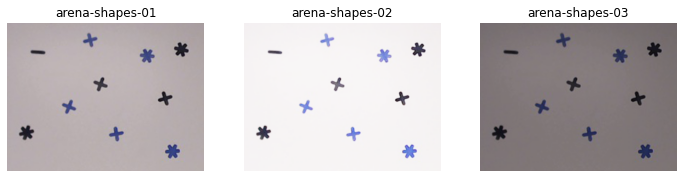

In [52]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color
Voor menne partner

### 2.3 Total area (in pixels) of each color

Our attempts at this exercise included several (eventually) unused approaches:

- K-means clustering: This approach was considered in order to remove the effect of non-uniformity in the displayed objects. For example, the upper blue cross in the second image shows some irregularities in its blue tone. By taking a number of 3 clusters (one cluster for background color, blue, and black), one can use functions from the Scikit-learn library to perform the clustering algorithm. However, the middle black cross was assigned some blue pixels after running the algorithm, probably because it has a strong gradient to lighter tones, which the algorithm considered to be closer to the center of the cluster representing blue. This approach was therefore discarded.

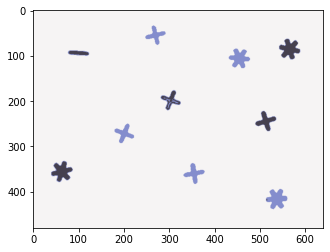

In [53]:
from sklearn.cluster import KMeans
import argparse
import cv2 as cv

image = images[1]
im_h, im_w = image.shape[:2]

image = cv.cvtColor(image, cv.COLOR_BGR2YCrCb)

image = image.reshape((image.shape[0]*image.shape[1], 3))

clt = KMeans(n_clusters = 3)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

quant = quant.reshape((im_h, im_w, 3))
image = image.reshape((im_h, im_w, 3))

quant = cv.cvtColor(quant, cv.COLOR_YCrCb2BGR)
image = cv.cvtColor(image, cv.COLOR_YCrCb2BGR)

plt.imshow(quant)
plt.show()

- Closing (mathematical morphology): One can also consider the closing technique, in hopes of removing some noise on the images. However, in the case of our given images, it did not have any relevant effect. [Explain]

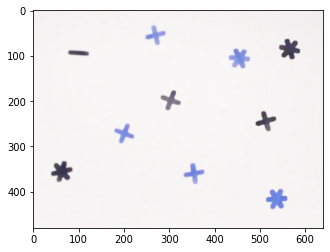

In [54]:
kernel = np.ones((5,5),np.uint8)
closed = cv.morphologyEx(image,cv.MORPH_CLOSE,kernel)

plt.imshow(closed)
plt.show()

And now the working procedure that we actually used:

1. Intensity normalization: In the implementation below, normalization can be chosen to be done either linearly or by use of the sigmoid function. 

    Linear normalization (also referred to as "contrast stretching") has the disadvantage that a single outlying pixel can lead to an unrepresentative scaling. We could improve this technique by looking at the histogram of each channel, and choosing the minimum/maximum as the 0.005%/3.5% percentile, respectively; however, this introduces the risk that, by considering every channel independently, the colors will after the normalization not be represented with the same RGB ratio as before. The best we can do to work against this is to try out different values for the percentiles until we get some results that are satisfactory enough. This is why we opted for the previously mentioned choice of percentiles.
    
    The second, non-linear, option that makes use of the sigmoid function works as well, only in the sense that the resulting images are very similar. However, they are rather dark, which can be easily explained by the mathematical properties of the sigmoid function (and those are rather intuitive). Therefore, we prefer the linear normalizatione.

In [1]:
def normalize_intensity(image, linear=True):
    """
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    image = image.astype('float')    
    for i in range(image.shape[2]):
        #min_intensity = np.amin(image[:,:,:])
        #max_intensity = np.amax(image[:,:,:])
        min_intensity = np.percentile(image[:,:,i],0.005)
        max_intensity = np.percentile(image[:,:,i],3.5)
        diff = max_intensity - min_intensity
        avg = np.mean(image[:,:,i])
        if min_intensity != max_intensity:
            if linear: 
                factor = 255.0 / diff
                image[:,:,i] = (image[:,:,i] - min_intensity) * factor
            else: 
                image[:,:,i] = 255.0 / (1.0 + np.exp((avg - image[:,:,i]) / diff))
    image = np.clip(image, 0.0, 255.0)
                
    return image.astype('uint8')

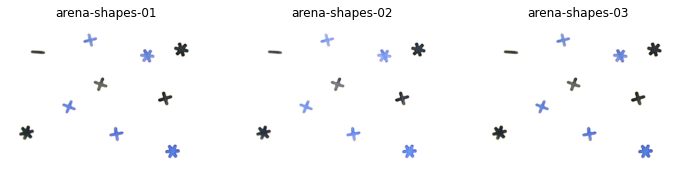

In [56]:
# Plot normalized images
images_normalized = np.array([normalize_intensity(images[0], True), normalize_intensity(images[1], True), 
                              normalize_intensity(images[2], True)])
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images_normalized, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

2. In the previous step, we obtained the normalized images. Therefore, we can now more easily define boundaries for the RGB-values of the different classes 'background', 'blue' and 'black'. We can check whether our estimate is somewhat realistic, by for example, setting all pixels belonging to a certain class to a white value.

Number of blue pixels in the first image: 4836
Blue area fraction: 0.0157421875


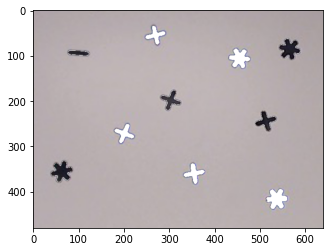

In [57]:
#First image
image = normalize_intensity(images[0])

mask_blue = np.logical_and.reduce((image[:,:,0]<=180,im[:,:,1]<=180,im[:,:,2]>120))
mask_background = np.logical_and.reduce((image[:,:,0]>180,im[:,:,1]>180,im[:,:,2]>150))
mask_black = np.logical_not((mask_background | mask_blue))
blue = np.sum(mask_blue)
print("Number of blue pixels in the first image: " + str(blue))

total_area = image.shape[0] * image.shape[1]
area_fraction = blue / total_area
print("Blue area fraction: " + str(area_fraction))

image_test = images[0].copy()
image_test[mask_blue] = 255
#image[200,100,:] = np.array([0,0,0])
plt.imshow(image_test)

Number of blue pixels in the second image: 4274
Blue area fraction: 0.013912760416666666


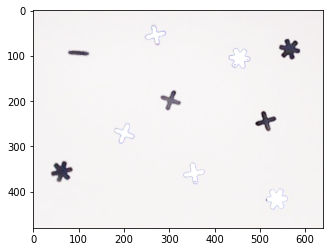

In [58]:
#Second image
image = normalize_intensity(images[1])

mask_blue = np.logical_and.reduce((image[:,:,0]<=180,im[:,:,1]<=180,im[:,:,2]>120))
mask_background = np.logical_and.reduce((image[:,:,0]>180,im[:,:,1]>180,im[:,:,2]>150))
mask_black = np.logical_not((mask_background | mask_blue))
blue = np.sum(mask_blue)
print("Number of blue pixels in the second image: " + str(blue))

total_area = image.shape[0] * image.shape[1]
area_fraction = blue / total_area
print("Blue area fraction: " + str(area_fraction))

image_test = images[1].copy()
image_test[mask_blue] = 255
#image[200,100,:] = np.array([0,0,0])
plt.imshow(image_test)

Number of blue pixels in the third image: 4856
Blue area fraction: 0.015807291666666667


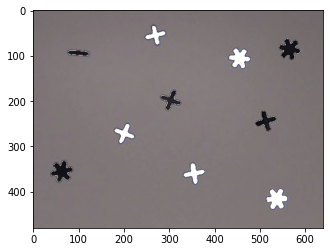

In [59]:
#Third image
image = normalize_intensity(images[2])

mask_blue = np.logical_and.reduce((image[:,:,0]<=180,im[:,:,1]<=180,im[:,:,2]>120))
mask_background = np.logical_and.reduce((image[:,:,0]>180,im[:,:,1]>180,im[:,:,2]>150))
mask_black = np.logical_not((mask_background | mask_blue))
blue = np.sum(mask_blue)
print("Number of blue pixels in the third image: " + str(blue))

total_area = image.shape[0] * image.shape[1]
area_fraction = blue / total_area
print("Blue area fraction: " + str(area_fraction))

image_test = images[2].copy()
image_test[mask_blue] = 255
#image[200,100,:] = np.array([0,0,0])
plt.imshow(image_test)

We thus get the following resulting numbers of blue pixels:

- First image: 4836 (1.57%)
- Second image: 4274 (1.39%)
- Third image: 4856 (1.58%)

As can be observed, the absolute estimates for the first and third image lie much closer together and seem to be considerably larger than the estimate for the second image; however, relatively seen (by looking at the fractions), all three estimates are actually rather consistent. The differences in these numbers, however relatively small, can probably be explained by the borders of the shown objects: depending on the initial illumination of the image, the border pixels might after the intensity normalization be classified in different color classes for different images. This is visible in the image shown after the estimates for each case: the pixels contained in the borders of the black objects are partially classified as blue (but this especially occurs for the images that had less illumination initially, i.e. images 1 and 3).